___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Does the ``gender`` of a driver have an impact on police behavior during a traffic stop? **In this chapter**, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

***

## Examining traffic violations

Before comparing the violations being committed by each gender, you should examine the ``violations`` committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the ``violation`` column, and then separately express those counts as proportions.

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data.** Continue to this chapter based on where you were in the end of the previous chapter.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_data.csv')

C:\Users\Joseph Forest\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1]:
df

NameError: name 'df' is not defined

In [ ]:
df.

**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.

In [44]:
df.violation.value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

***

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

You'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [10]:
female = df[df['driver_gender'] == 'F']

In [13]:
male = df[df['driver_gender'] == 'M']

In [80]:
female['violation'].value_counts(normalize=True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

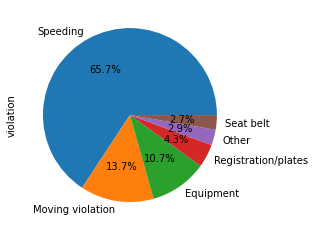

In [75]:
female['violation'].value_counts().plot.pie(autopct="%.1f%%");


In [81]:
female['violation'].value_counts(normalize=True, sort = True)

Speeding               0.657308
Moving violation       0.136581
Equipment              0.107055
Registration/plates    0.043077
Other                  0.028908
Seat belt              0.027071
Name: violation, dtype: float64

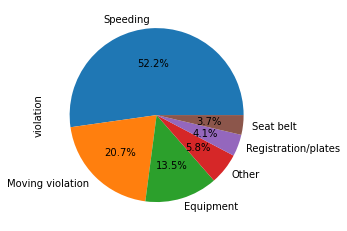

In [82]:
male['violation'].value_counts().plot.pie(autopct="%.1f%%");

***

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, you'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [50]:
female_and_speeding = df[(df['driver_gender'] == 'F') & (df['violation'] == 'Speeding')]

In [55]:
male_and_speeding = df[(df['driver_gender'] == 'M') & (df['violation'] == 'Speeding')]

In [84]:
female_and_speeding.stop_outcome.value_counts(normalize=True, sort= True)

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64

In [90]:
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.953247
Warning             0.039003
Arrest Driver       0.005290
Arrest Passenger    0.001033
N/D                 0.000905
No Action           0.000522
Name: stop_outcome, dtype: float64

***

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [91]:
df.search_conducted.dtypes

dtype('bool')

In [95]:
df.search_conducted.value_counts(normalize=True)

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

***

## Comparing search rates by gender

You'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, you'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [111]:
df[df['driver_gender'] == 'F']['search_conducted'].mean()

0.018751239152648355

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.

In [109]:
df[df['driver_gender'] == 'M']['search_conducted'].mean()

0.04379217389811301

**INSTRUCTIONS 3/3**

*   Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [110]:
df.groupby('driver_gender')['search_conducted'].mean()

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64

***

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [129]:
df.groupby(["driver_gender",'violation']).mean()[['search_conducted']]

search_conducted
driver_gender violation                            
F             Equipment                    0.040245
              Moving violation             0.038021
              Other                        0.045898
              Registration/plates          0.054700
              Seat belt                    0.017746
              Speeding                     0.007738
M             Equipment                    0.070916
              Moving violation             0.059156
              Other                        0.046120
              Registration/plates          0.103589
              Seat belt                    0.031705
              Speeding                     0.026630

In [126]:
df.search_conducted

0         False
1         False
2         False
3         False
4         False
          ...  
480579    False
480580    False
480581    False
480582    False
480583    False
Name: search_conducted, Length: 480584, dtype: bool

**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [130]:
df.groupby(['violation',"driver_gender"]).mean()[['search_conducted']]

search_conducted
violation           driver_gender                  
Equipment           F                      0.040245
                    M                      0.070916
Moving violation    F                      0.038021
                    M                      0.059156
Other               F                      0.045898
                    M                      0.046120
Registration/plates F                      0.054700
                    M                      0.103589
Seat belt           F                      0.017746
                    M                      0.031705
Speeding            F                      0.007738
                    M                      0.026630

***

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

You'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``"Protective Frisk"`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``"Protective Frisk"`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [135]:
(df['search_type'] == "Protective Frisk").sum()

879

In [137]:
df['search_type'] == "Protective Frisk"

0         False
1         False
2         False
3         False
4         False
          ...  
480579    False
480580    False
480581    False
480582    False
480583    False
Name: search_type, Length: 480584, dtype: bool

In [138]:
df['frisk'] = df['search_type'] == "Protective Frisk"

In [139]:
df.head()

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False


***

## Comparing frisk rates by gender

You'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

**INSTRUCTIONS**

*   Create a ``DataFrame``, searched, that only contains rows in which ``search_conducted`` is ``True``.
*   Take the mean of the frisk column to find out what percentage of searches included a frisk.
*   Calculate the frisk rate for each gender using a ``.groupby()``.

In [141]:
df['search_conducted'] == True

0         False
1         False
2         False
3         False
4         False
          ...  
480579    False
480580    False
480581    False
480582    False
480583    False
Name: search_conducted, Length: 480584, dtype: bool

In [142]:
searched = df[df['search_conducted'] == True]

In [145]:
df['frisk'].value_counts(normalize=True)

False    0.998171
True     0.001829
Name: frisk, dtype: float64

In [149]:
df.groupby(['driver_gender'])['frisk'].mean()

driver_gender
F    0.000793
M    0.002218
Name: frisk, dtype: float64